In [ ]:
This notebook is to check the outputs from tikhonov regressions
There are two major things that we want to check
1. are the medial wall zero values being handled well and indexed? 
2. What is the distribution of the values?
3. can we concatenate the values easily back together? are there issues if running the jobs in chunks? 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# directory

In [1]:
mount_dir = 'smb://dartfs/rc/lab/D/DBIC/DBIC/f0042x1/life-encoding/scripts/tikreg-pca/'
mount_dir = '/Volumes/life-encoding/scripts/tikreg-pca'

In [ ]:
# parameters
MODEL="visual"
ALIGN="ws"
STIM1="bg"
STIM2="actions"
STIM3="agents"
SUB="sub-rid000024"
RUN=3
HEMI="lh"
NODE=32


In [4]:
sub = 'sub-rid000024'
model = 'visual'
align = 'ws'
feature = 'actions'
hemi = 'lh'
node_range = 32
increment = 20
run = 3
fold_shifted = run + 1


In [5]:
filename = 'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi-{5}_range-620-639.json'.format(
    sub, model, align, feature, fold_shifted, hemi )

In [ ]:
n_vertices = 40962
n_proc = 32     # how many cores do we have?
n_medial = {'lh': 3486, 'rh': 3491}

alpha_shape = n_vertices - n_medial[hemi]
zero_df = pd.DataFrame(np.zeros(( n_vertices, 1)))

In [ ]:
# output corr .json as niml.dset
## load file
## if numpy array
## 
df_x1 = pd.DataFrame(corr_x1_numpy)

df_x1.rename({0:'index', 1:'corr'}, axis = 'columns', inplace = True)
df_x1['index'] = df_x1['index'].astype(int)
df_x1.set_index('index', inplace = True)
del df_x1.index.name
df_x1.rename({'corr':0}, axis = 'columns', inplace = True)

# merge
zero_df.update(df_x1)

## medial wall

In [ ]:
ind_nonmedial: [620 621 622 623 624 625 626 627 628 629 630 631 632 633]
ind_medial: [634 635 636 637 638 639]

In [ ]:
cortical_vertices = {}
for half in ['lh', 'rh']:
    test_ds = mv.niml.read(
        '/dartfs/rc/lab/D/DBIC/DBIC/life_data/niml/ws.{0}.niml.dset'.format(half))
    cortical_vertices[half] = np.ones((n_vertices))
    cortical_vertices[half][np.sum(
        test_ds.samples[1:, :] != 0, axis=0) == 0] = 0
med_wall_ind = np.where(cortical_vertices[hemi] == 0)[0]


In [ ]:
med_df = pd.DataFrame(med_wall_ind)
med_df.rename({0:'index'}, axis = 'columns', inplace = True)
med_df['values'] = 0
med_df['index'] = med_df['index'].astype(int)
med_df.set_index('index', inplace = True)
del med_df.index.name
med_df.rename({'values':0}, axis = 'columns', inplace = True)


In [ ]:
zero_df.update(med_df)

In [ ]:
# pandas dataframe as numpy
output = zero_df[0].to_list()
out_x1 = np.transpose(output)

In [ ]:
# out1 = np.zeros(
#     (corr_x1.shape[0] + med_wall_ind.shape[0]), dtype=np.dtype(corr_x1).type)
# out1[cortical_vertices[hemi] == 1] = corr_x1
mv.niml.write(os.path.join(mount_dir, 'sample_data'
                           'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi_{5}.niml.dset'.format(
    sub, model, align, feature, fold_shifted, hemi)), out_x1[None, :])
# sub, model, align, feature, fold_shifted, hemi

# mv.niml.write(os.path.join(directory, 'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi_{5}.niml.dset'.format(test_p, model, align, stimfile1, fold_shifted, hemi)), out1[None,:])

# read and plot

In [7]:
test_ds = mv.niml.read('/Volumes/life-encoding/scripts/tikreg-pca/sample_data/corrcoef_sub-rid000024_model-visual_align-ws_feature-actions_foldshifted-4_hemi_lh.niml.dset')


NameError: name 'mv' is not defined

In [6]:
from nilearn.plotting import plot_surf
main_dir = '/Users/h/suma-fsaverage6'
fsaverage_gii_L = os.path.join(main_dir , 'lh.inf_50.gii')
fsaverage_gii_R = os.path.join(main_dir , 'rh.inf_50.gii')
# fsaverage_inflated_L = os.path.join(main_dir , 'fs_templates', 'lh.inflated.gii')
# fsaverage_inflated_R = os.path.join(main_dir , 'fs_templates', 'rh.inflated.gii')

figure, axes = plt.subplots(3,2,subplot_kw={'projection': '3d'},figsize = (12,20))

# plot_surf(fsaverage_gii,np.mean(group_ds,axis = 0),colorbar = True)
plot_surf(fsaverage_inflated_L,mean_cltax_behtask_L, 
          title='Taxonomy classification \n behavior attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[0][0])
plot_surf(fsaverage_inflated_R,mean_cltax_behtask_R,  colorbar = True, 
          title='Taxonomy classification \n behavior attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[0][1])
plot_surf(fsaverage_inflated_L,mean_cltax_taxtask_L, 
          title='Taxonomy classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[1][0])
plot_surf(fsaverage_inflated_R,mean_cltax_taxtask_R,  colorbar = True, 
          title='Taxonomy classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[1][1])
plot_surf(fsaverage_inflated_L,mean_cltax_taxtask_L,
          title='Taxonomy classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'ventral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[2][0])
plot_surf(fsaverage_inflated_R,mean_cltax_taxtask_R,  colorbar = True, 
          title='Taxonomy classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'ventral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[2][1])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'corrcoef_sub-rid000024_model-visual_align-ws_feature-actions_foldshifted-4_hemi-lh_range-620-639.json'

In [ ]:
mv.niml.write(os.path.join(mount_dir, 'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi_{5}.niml.dset'.format(
    test_p, model, align, stimfile1, fold_shifted, hemi)), out1[None, :])

In [8]:
hyper_json = [[620.0, 695.1927961775606], [621.0, 1.0], [622.0, 12.742749857031335], [623.0, 1000.0], [624.0, 2.0691380811147897], [625.0, 1.0], [626.0, 1.0], [627.0, 1.0], [628.0, 1.4384498882876628], [629.0, 1.0], [630.0, 1.0], [631.0, 1.0], [632.0, 1.0], [633.0, 1.4384498882876628], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]

In [22]:
hyper_df = pd.DataFrame(hyper_json)
hyper_df.rename({0:'node', 1:'hyperparameter'}, axis = 'columns', inplace = True)

,node,hyperparameter
0,620.0,695.192796
1,621.0,1.000000
2,622.0,12.742750
3,623.0,1000.000000
4,624.0,2.069138
5,625.0,1.000000
6,626.0,1.000000
7,627.0,1.000000
8,628.0,1.438450
9,629.0,1.000000


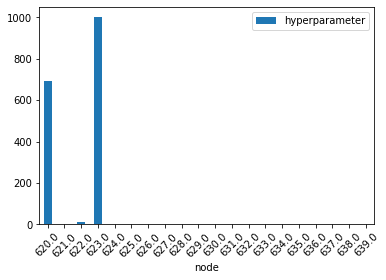

In [24]:
# ax = hdf.hist( column =, bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
ax = hyper_df.plot.bar(x='node', y='hyperparameter', rot=45, )


In [25]:
agents = [[620.0, 0.10695616303286573], [621.0, 0.02128152281791051], [622.0, -0.01837538615319036], [623.0, -0.000278182130573883], [624.0, -0.028110885705515034], [625.0, 0.02967483778689951], [626.0, -0.03297624406079272], [627.0, 0.042398755909459705], [628.0, 0.12069200106252079], [629.0, 0.03890297569893964], [630.0, -0.03120836065983936], [631.0, 0.10789853905313117], [632.0, 0.015373558401851253], [633.0, 0.06407799381586407], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]
action = [[620.0, 0.057810373571303836], [621.0, -0.002548900069375225], [622.0, -0.060863688944311406], [623.0, -0.033617572178613185], [624.0, -0.0018892971883925057], [625.0, -0.05953620448770989], [626.0, 0.041181464925561954], [627.0, -0.04275997206753953], [628.0, -0.15230564776594252], [629.0, 0.07952839729327271], [630.0, 0.09369913616092113], [631.0, -0.05172676992746117], [632.0, -0.04631593605890774], [633.0, -0.050068542375352826], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]
bg = [[620.0, 0.034447622811498824], [621.0, 0.02989496813903791], [622.0, -0.061964536052863825], [623.0, 0.006505281511526065], [624.0, -0.011971986745725267], [625.0, 0.008792168849028538], [626.0, 0.09182656636356688], [627.0, 0.10201178384297643], [628.0, 0.015941938750238988], [629.0, -0.06262432595457539], [630.0, 0.16827754534029557], [631.0, -0.0056362395011768434], [632.0, -0.046294778490532776], [633.0, -0.03576926073522345], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]



In [26]:
agent_df = pd.DataFrame(agents)
action_df = pd.DataFrame(action)
bg_df = pd.DataFrame(bg)

In [28]:
agent_df['feature'] = 'agent'
action_df['feature'] = 'action'
bg_df['feature'] = 'background'

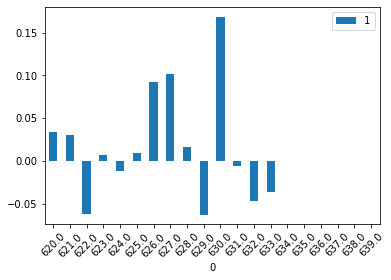

In [36]:
ax = bg_df.plot.bar(x=0, y=1, rot=45,)


In [30]:
stack_df = pd.concat([agent_df, action_df, bg_df])

In [32]:
sdf =  stack_df.rename({0:'node', 1:'correlation'}, axis = 'columns')

In [33]:
sdf

,node,correlation,feature
0,620.0,0.106956,agent
1,621.0,0.021282,agent
2,622.0,-0.018375,agent
3,623.0,-0.000278,agent
4,624.0,-0.028111,agent
5,625.0,0.029675,agent
6,626.0,-0.032976,agent
7,627.0,0.042399,agent
8,628.0,0.120692,agent
9,629.0,0.038903,agent


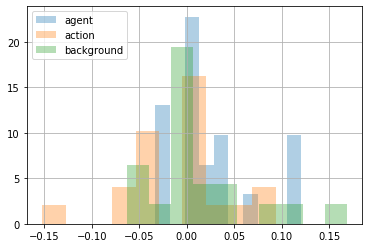

In [44]:
# https://stackoverflow.com/questions/48238305/bar-plot-with-groupby

for g in pd.unique(sdf['feature']):
    sdf.loc[sdf['feature']==g,'correlation'].hist(alpha=0.35,
                                             label=g,density=True)
plt.legend(loc='upper left')


# sdf.groupby('feature')['correlation'].hist(bins=10, alpha=0.65, density=True, label=g)

NameError: name 'StrMethodFormatter' is not defined

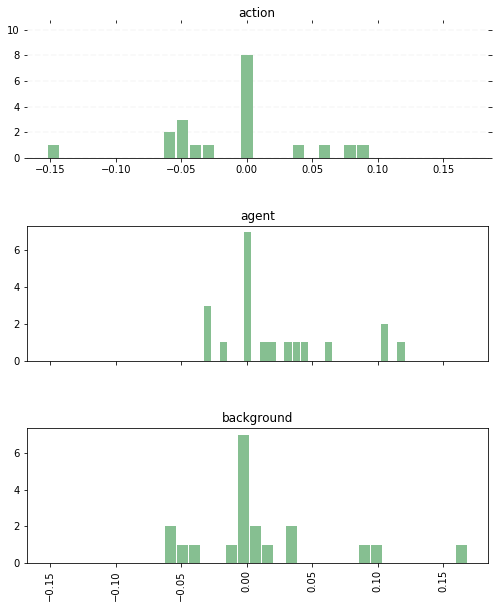

In [45]:
ax = sdf.hist(column='correlation', by='feature', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Correlation coefficients", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Sessions", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)
    